# データ・サイエンス	データ・サイエンス社会応用論 / ICT社会応用演習Ⅳ
## 9-4. 交通事故統計情報の分析（東京都内毎時集計）

### 1. 下準備
#### 1-a) ライブラリのインポート

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import jpholiday
import japanize_matplotlib

#### 1-b) 交通事故統計情報の読み込み

In [2]:
df_accident1 = pd.read_csv('data/accident/honhyo_2019.csv', encoding='SHIFT-JIS')
df_accident2 = pd.read_csv('data/accident/honhyo_2020.csv', encoding='SHIFT-JIS')
df_accident3 = pd.read_csv('data/accident/honhyo_2021.csv', encoding='SHIFT-JIS')
df_accident = pd.concat([df_accident1, df_accident2, df_accident3])
df_accident['年月日時'] = pd.to_datetime({
    'year' : df_accident['発生日時　　年'], 'month' : df_accident['発生日時　　月'], 
    'day' : df_accident['発生日時　　日'], 'hour' : df_accident['発生日時　　時']
})
df_accident

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日時
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,431412959,1414947029,6,3,2018-12-28 10:00:00
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,425706029,1413039991,1,3,2019-01-06 13:00:00
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,424115557,1414158530,3,3,2018-12-18 08:00:00
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,425647051,1413100440,7,3,2019-01-05 11:00:00
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,425606992,1420518034,2,2,2018-12-31 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305191,1,97,114,166,2,0,4,33410,0,0,...,1,2,2,2,2,261031432,1273909676,6,3,2021-12-10 21:00:00
305192,1,97,114,167,2,0,1,33410,0,0,...,2,2,2,4,2,260918133,1274003673,4,3,2021-12-15 11:00:00
305193,1,97,114,168,2,0,1,10070,0,0,...,2,2,2,4,2,261022159,1274124558,4,3,2021-12-22 18:00:00
305194,1,97,114,169,2,0,1,33410,0,0,...,0,2,0,4,2,260955144,1273944244,6,3,2021-12-24 15:00:00


#### 1-c) 東京都内の2019年1月1日以降のデータの抽出

In [3]:
df_accident_tokyo = df_accident[df_accident['都道府県コード'] == 30]
df_accident_tokyo = df_accident_tokyo[df_accident_tokyo['年月日時'] >= datetime(2019, 1, 1)]
df_accident_tokyo

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),年月日時
2634,1,30,69,1,1,1,0,50230,1,0,...,1,2,2,4,1,353942627,1394821836,5,3,2019-01-03 03:00:00
2664,1,30,69,31,2,0,4,42710,1,0,...,2,2,2,2,4,353730552,1393608760,3,1,2019-01-01 11:00:00
2666,1,30,69,33,2,0,4,50140,2,0,...,2,2,2,4,2,354006471,1393806616,3,1,2019-01-01 14:00:00
2667,1,30,69,34,2,0,6,50150,1,0,...,2,2,2,4,2,354129346,1394529542,5,3,2019-01-03 13:00:00
2668,1,30,69,35,2,0,2,42720,2,0,...,2,2,2,4,4,353017828,1392853612,7,3,2019-01-12 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278536,1,30,896,1,2,0,1,20000,0,0,...,0,2,0,2,0,344058095,1392550060,6,3,2021-12-24 23:00:00
278537,1,30,896,2,2,0,1,30000,0,0,...,0,2,0,4,2,344600797,1392116172,3,3,2021-12-28 13:00:00
278538,1,30,899,17,2,0,1,30000,0,0,...,0,2,0,2,0,330737268,1394728005,1,3,2021-12-05 23:00:00
278539,1,30,899,18,2,0,2,30000,0,0,...,0,2,0,2,0,330742616,1394811278,7,3,2021-12-11 18:00:00


#### 1-d) 日時毎の集計

In [4]:
df_accident_tokyo_hourly = df_accident_tokyo.groupby(['年月日時'], as_index=False)[['死者数', '負傷者数']].sum()
df_accident_tokyo_hourly

,年月日時,死者数,負傷者数
0,2019-01-01 04:00:00,0,4
1,2019-01-01 05:00:00,0,1
2,2019-01-01 06:00:00,0,2
3,2019-01-01 09:00:00,0,1
4,2019-01-01 10:00:00,0,7
...,...,...,...
21446,2021-12-31 15:00:00,0,1
21447,2021-12-31 16:00:00,0,5
21448,2021-12-31 18:00:00,0,3
21449,2021-12-31 20:00:00,0,3


#### 1-e) 気象データの読み込み

In [5]:
df_weather1 = pd.read_csv('data/weather/rain_tokyo_2019.csv', encoding='SHIFT-JIS', header=2)
df_weather1 = df_weather1.drop([0,1]).reset_index(drop=True)

df_weather2 = pd.read_csv('data/weather/rain_tokyo_2020.csv', encoding='SHIFT-JIS', header=2)
df_weather2 = df_weather2.drop([0,1]).reset_index(drop=True)

df_weather3 = pd.read_csv('data/weather/rain_tokyo_2021.csv', encoding='SHIFT-JIS', header=2)
df_weather3 = df_weather3.drop([0,1]).reset_index(drop=True)

df_weather = pd.concat([df_weather1, df_weather2, df_weather3])
df_weather['年月日時'] = pd.to_datetime(df_weather['年月日時']) - timedelta(hours=1)
df_weather

,年月日時,降水量(mm),降水量(mm).1
0,2019-01-01 01:00:00,0.0,1
1,2019-01-01 02:00:00,0.0,1
2,2019-01-01 03:00:00,0.0,1
3,2019-01-01 04:00:00,0.0,1
4,2019-01-01 05:00:00,0.0,1
...,...,...,...
8754,2021-12-31 19:00:00,0.0,1
8755,2021-12-31 20:00:00,0.0,1
8756,2021-12-31 21:00:00,0.0,1
8757,2021-12-31 22:00:00,0.0,1


#### 1-f) 事故データと天候データの結合

In [6]:
df_accident_weather = pd.merge(df_accident_tokyo_hourly, df_weather, on='年月日時', how='right').fillna(0)
df_accident_weather

,年月日時,死者数,負傷者数,降水量(mm),降水量(mm).1
0,2019-01-01 01:00:00,0.0,0.0,0.0,1
1,2019-01-01 02:00:00,0.0,0.0,0.0,1
2,2019-01-01 03:00:00,0.0,0.0,0.0,1
3,2019-01-01 04:00:00,0.0,4.0,0.0,1
4,2019-01-01 05:00:00,0.0,1.0,0.0,1
...,...,...,...,...,...
26296,2021-12-31 19:00:00,0.0,0.0,0.0,1
26297,2021-12-31 20:00:00,0.0,3.0,0.0,1
26298,2021-12-31 21:00:00,0.0,1.0,0.0,1
26299,2021-12-31 22:00:00,0.0,0.0,0.0,1


#### 1-g) 曜日と祝日の追加

In [7]:
df_accident_weather['曜日'] = df_accident_weather['年月日時'].dt.weekday
df_accident_weather['祝日'] = df_accident_weather['年月日時'].dt.date.map(jpholiday.is_holiday).astype(int)
df_accident_weather['時'] = df_accident_weather['年月日時'].dt.hour
df_accident_weather

,年月日時,死者数,負傷者数,降水量(mm),降水量(mm).1,曜日,祝日,時
0,2019-01-01 01:00:00,0.0,0.0,0.0,1,1,1,1
1,2019-01-01 02:00:00,0.0,0.0,0.0,1,1,1,2
2,2019-01-01 03:00:00,0.0,0.0,0.0,1,1,1,3
3,2019-01-01 04:00:00,0.0,4.0,0.0,1,1,1,4
4,2019-01-01 05:00:00,0.0,1.0,0.0,1,1,1,5
...,...,...,...,...,...,...,...,...
26296,2021-12-31 19:00:00,0.0,0.0,0.0,1,4,0,19
26297,2021-12-31 20:00:00,0.0,3.0,0.0,1,4,0,20
26298,2021-12-31 21:00:00,0.0,1.0,0.0,1,4,0,21
26299,2021-12-31 22:00:00,0.0,0.0,0.0,1,4,0,22


### 2. 気象データと組み合わせた分析
#### 2-a) 平日と休日の分割

In [8]:
df_accident_weather_normal = df_accident_weather[(df_accident_weather['曜日'] < 5) & (df_accident_weather['祝日'] == False)]
df_accident_weather_normal

,年月日時,死者数,負傷者数,降水量(mm),降水量(mm).1,曜日,祝日,時
23,2019-01-02 00:00:00,0.0,0.0,0.0,1,2,0,0
24,2019-01-02 01:00:00,0.0,3.0,0.0,1,2,0,1
25,2019-01-02 02:00:00,0.0,0.0,0.0,1,2,0,2
26,2019-01-02 03:00:00,0.0,3.0,0.0,1,2,0,3
27,2019-01-02 04:00:00,0.0,0.0,0.0,1,2,0,4
...,...,...,...,...,...,...,...,...
26296,2021-12-31 19:00:00,0.0,0.0,0.0,1,4,0,19
26297,2021-12-31 20:00:00,0.0,3.0,0.0,1,4,0,20
26298,2021-12-31 21:00:00,0.0,1.0,0.0,1,4,0,21
26299,2021-12-31 22:00:00,0.0,0.0,0.0,1,4,0,22


In [9]:
df_accident_weather_holiday = df_accident_weather[(df_accident_weather['曜日'] >= 5) | (df_accident_weather['祝日'] == True)]
df_accident_weather_holiday

,年月日時,死者数,負傷者数,降水量(mm),降水量(mm).1,曜日,祝日,時
0,2019-01-01 01:00:00,0.0,0.0,0.0,1,1,1,1
1,2019-01-01 02:00:00,0.0,0.0,0.0,1,1,1,2
2,2019-01-01 03:00:00,0.0,0.0,0.0,1,1,1,3
3,2019-01-01 04:00:00,0.0,4.0,0.0,1,1,1,4
4,2019-01-01 05:00:00,0.0,1.0,0.0,1,1,1,5
...,...,...,...,...,...,...,...,...
26176,2021-12-26 19:00:00,0.0,3.0,0.0,1,6,0,19
26177,2021-12-26 20:00:00,0.0,1.0,0.0,1,6,0,20
26178,2021-12-26 21:00:00,0.0,1.0,0.0,1,6,0,21
26179,2021-12-26 22:00:00,0.0,0.0,0.0,1,6,0,22


#### 2-b) 平日の1時間あたりの負傷者数の分布

In [10]:
df_accident_weather_normal_rain = df_accident_weather_normal[df_accident_weather_normal['降水量(mm)'] > 0]
df_accident_weather_normal_norain = df_accident_weather_normal[df_accident_weather_normal['降水量(mm)'] == 0]

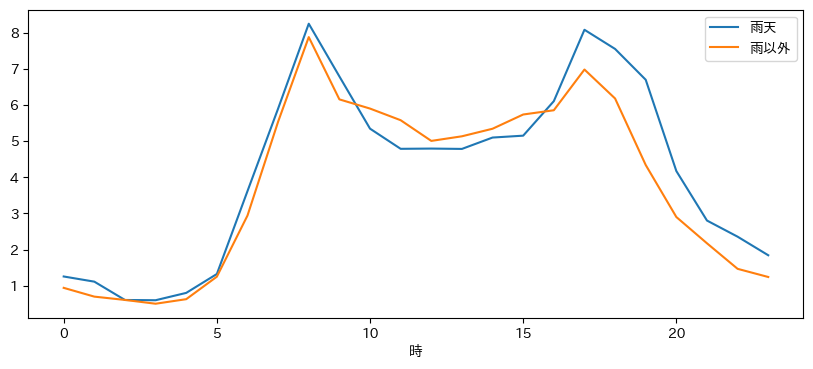

In [11]:
rain = df_accident_weather_normal_rain.groupby('時')['負傷者数'].mean()
norain = df_accident_weather_normal_norain.groupby('時')['負傷者数'].mean()

df_accident_weather_normal_average = pd.DataFrame({ '雨天' : rain, '雨以外' : norain })
df_accident_weather_normal_average.plot(figsize=(10, 4))
plt.show()

#### 2-c) 休日の1時間あたりの負傷者数の分布

In [12]:
df_accident_weather_holiday_norain = df_accident_weather_holiday[df_accident_weather_holiday['降水量(mm)'] == 0]
df_accident_weather_holiday_rain = df_accident_weather_holiday[df_accident_weather_holiday['降水量(mm)'] > 0]

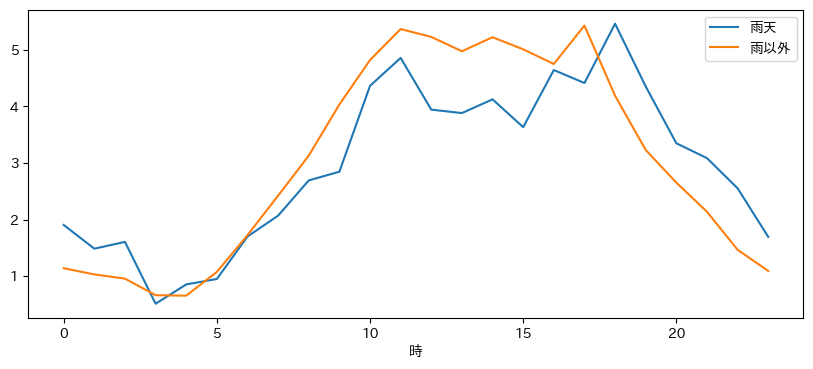

In [13]:
rain = df_accident_weather_holiday_rain.groupby('時')['負傷者数'].mean()
norain = df_accident_weather_holiday_norain.groupby('時')['負傷者数'].mean()

df_accident_weather_holiday_average = pd.DataFrame({ '雨天' : rain, '雨以外' : norain })
df_accident_weather_holiday_average.plot(figsize=(10, 4))
plt.show()